#  Описание проекта 


В интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры доступны данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). данные до 2016 года.Сейчас декабрь 2016 г., и в проекте планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

Цель

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами

Описание данных
[/datasets/games.csv](https://code.s3.yandex.net/datasets/games.csv)
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

План работы
* Шаг 1. Откроем файл с данными и изучим общую информацию
* Шаг 2. Подготовим данные
  * Заменим названия столбцов (приведение к нижнему регистру);
  * Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
  * Обработаем пропуски при необходимости:
     * Почему заполняли пропуски определённым образом или почему не стали это делать;
     * Попробуем описать причины, которые могли привести к пропускам;
     * Аббревиатуру 'tbd' в столбце с оценкой пользователей отдельно разберем это значение и опишем, как его обработать;
    * Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
* Шаг 3. Проведем исследовательский анализ данных
    * Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    * Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    * Возьмем данные за соответствующий актуальный период. Актуальный период определите самостоятельно основной фактор — эти данные помогут построить прогноз на 2017 год.
    * Далее работаем с усеченным данными
    * Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
    * Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    * Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
    * Соотнесем выводы с продажами игр на других платформах.
    * Посмотрим на общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?
* Шаг 4. Составим портрет пользователя каждого региона
    * Определим для пользователя каждого региона (NA, EU, JP):
        * Самые популярные платформы (топ-5). Опишите различия в долях продаж.
        * Самые популярные жанры (топ-5). Поясните разницу.
        * Влияет ли рейтинг ESRB на продажи в отдельном регионе?
* Шаг 5. Проверим гипотезы
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Шаг 6. Напишем общий вывод

## Шаг. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd# Импортируем необходимые библиотеки
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
try:
    df=pd.read_csv('/datasets/games.csv')
except:
    df=pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
display(df.head())
display(df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [3]:
df.duplicated().sum()# Проводим проверку на явные дубликаты

0

Вывод:Датасет содержит 16715 строк.Необходимо привести названия столбцов к змеиному регистру. Большое колличество пропусков в столбцах Critic_Score,User_Score и Rating. Незначительное колличество пропусков в столбцах Year_of_Release и Name.

## Шаг. Подготовка данных

### Приводим названия колонок к нижнему регистру

In [4]:
df.columns = df.columns.str.lower()#Приводим названия колонок к нижнему регистру
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Ищем неявные дубликаты в столбце name

In [5]:
display(df[df.duplicated(subset=['name','platform','year_of_release'])==True])
df.drop_duplicates(subset=['name','platform','year_of_release'],keep='first',inplace=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [6]:
df1=df.query('platform == "DS"').query('year_of_release<2000')# В этой строке год выпуска игры значительно меньше чем год выхода латформы
df.reset_index(drop=True)
df[(df['year_of_release']==1985) & (df['platform'] == "DS")]['year_of_release']
df.loc[15957,'year_of_release']=2004
df1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Наличие дубликатов связано с тем что в даннык рейтинг для некоторых игр представлен на разных платформах.Избавились от двух строк с пропушенными значениеми в name, и одного неявного дубликата для игры Madden NFL 13

### name

In [7]:
display(df.query('name.isna()==True'))#Игры без названий интереса не представляют
df=df.dropna(subset=['name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


### year_of_release

In [8]:
display(df['year_of_release'].isna().sum())#269 пропусков в данных о годе выпуска
df=df.dropna(subset=['year_of_release'])#избавляемся от них т.к. составляют менее 2 % данных
df.year_of_release=df.year_of_release.astype('int64')#приводим к целочисленному типу

269

### critic_score

In [9]:
display(df['critic_score'].unique())
df['critic_score'] = df.critic_score.astype('Int64')

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

### user_score

In [10]:
display(df.user_score.unique())
#TBD - аббревиатура от английского To Be Determined (будет определено) скорее всего было мало отзывов для формирования рейтинга
#Заменим значение "tbd"  на NaN
df.user_score = df.user_score.replace('tbd', np.NaN)
df.user_score = df.user_score.astype('float64')

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

### rating

In [11]:
df.rating = df.rating.fillna("Unknown")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


Первичная обработка данных завершена, на этом этапе датасет был очищен от 271 строки, на основании отсутствия данных в столбцах name и year_of_release, что составляет менее 2 % от всех данных.
Так же столбцы critic_score, user_score и rating были приведены к соответствующим типам данных, пропуски в этих столбцах были обработаны,значение "tbd" в user_score было изменено на NaN

### Посчитаем суммарные продажи во всех регионах

In [15]:
df['w_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,w_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Вывод:Пропуски в столбцах name и  genre скорее всего случайны, может при заполнении данных таблицы были пропущены значения. А в столбцах critic_score, user_score и rating тем, что для некоторых игр рейтинг не собирался, в виду небольшой популярности игры или ранним годом выпуска.

## Шаг. Исследовательский анализ данных
### Посмотрим, сколько игр выпускалось в разные годы.

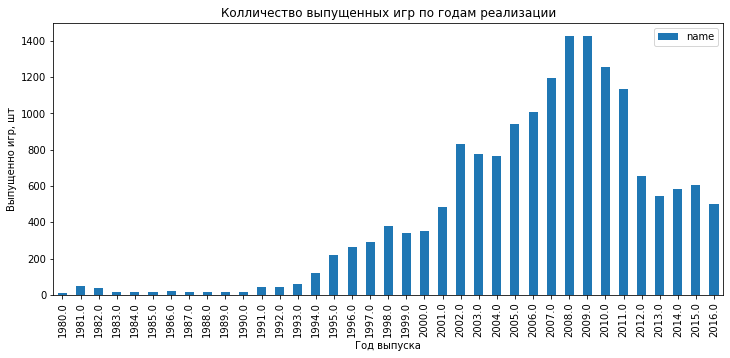

In [16]:
df_years = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')
df_years.plot(kind='bar', ylabel='',title='Колличество выпущенных игр по годам реализации', figsize=(12, 5),rot=90)
plt.xlabel('Год выпуска')
plt.ylabel('Выпущенно игр, шт');

До 1994 года игры выпускались не чаще чем 100 штук в год, эта часть данных для дальнейшего анализа малопоказательна.Затем вплоть до 2009 года наблюдается увеличение колличества выпускаемых игр, после 2010 года новинок игровой индустрии становится меньше
,и к 2012 уровень выпуска новинок падает до уровня в начале тысячелетия.

### Посмотрbим, как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы?

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

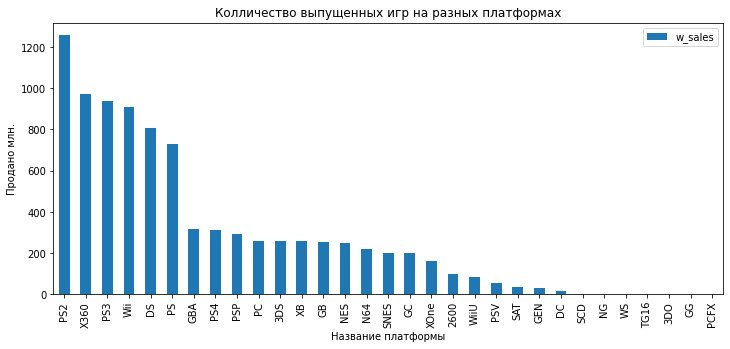

In [19]:
df_platform=df.groupby(['platform']).agg({'w_sales':'sum'}).sort_values(by='w_sales', ascending=False)
df_platform.plot(kind='bar', ylabel='',title='Колличество выпущенных игр на разных платформах', figsize=(12, 5),rot=90)
plt.xlabel('Название платформы')
plt.ylabel('Продано млн.')
platform = list(df_platform.index[:6])
platform

Самыми популярными платформами являются ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

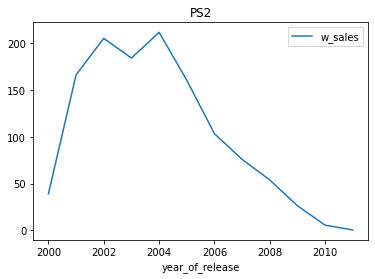

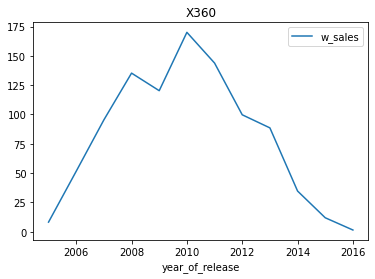

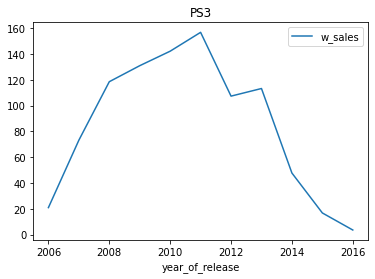

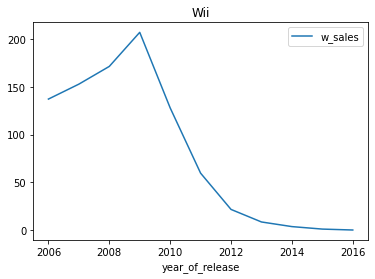

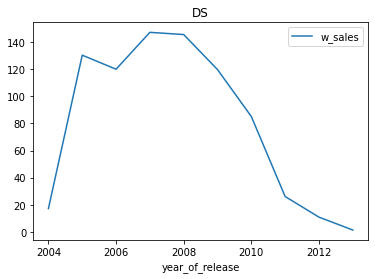

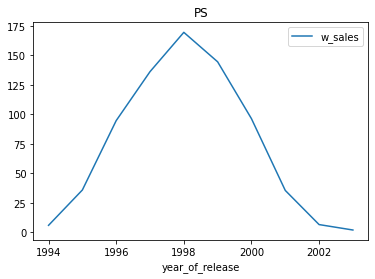

In [15]:
for pltf in platform:
    pltf_sales = pd.pivot_table(df.query('platform == @pltf'), index=['year_of_release'], values='w_sales', aggfunc='sum')
    pltf_sales.plot();
    plt.title(pltf)

Из построеных графиков распределения видны продажи игр на разные платформы в зависимости от годов выпуска.

* Самая популярная платформа PS2 имеет пик продаж в 2004 году, со сроком жизни платформы в 10 лет
* Пик продаж игр на платформу XBOX360 приходится на 2010 год, платформа была популярна на протяжении 11 лет
* PS3 Имеет очень похожий максимум продаж, и тоде продержалась 10 лет
* Приставка Wii со старта продаж заимела высокую популярность,но за три года прекратила рост и продажи быстро упали.Срок жизни 6 лет
* Платформа DS принимает пик популярности в 2008 году, 9 лет была популярна
* Платформа PS в 1988 году самая продаваемая, 8 лет держалась на рынке
Вывод: Срок жизни платформы в среднем составляет 9 лет, после этого платформа либо вытесняется конкурентами, либо заменяется новым поколением.

### Возьмем данные за актуальный период. 
Актуальный период необходимо определить для построения прогноза на 2017 год.С учетом распределения продаж самых популярных платформ возьмем срез данных с 2013 года, так как в этом году вышла новая платформа PS4, а популярные платформы уже идут на спад Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


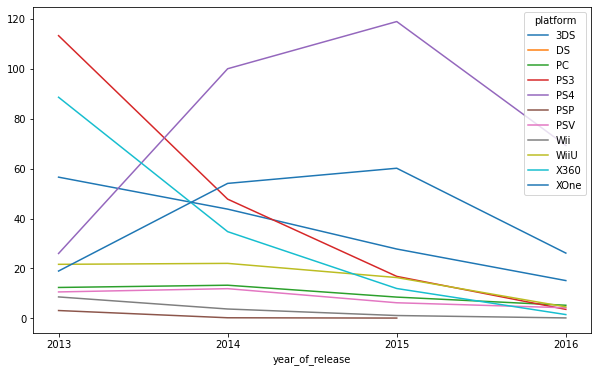

In [24]:
df_act=df.query('year_of_release>=2013')
platform=df_act.pivot_table(index='year_of_release',columns='platform',values='w_sales',aggfunc='sum')
platform.plot(figsize=(10,6));
plt.xticks(ticks=np.arange(2013,2017,1));

Самым прибыльными по состоянию на 2016 год можно считать платформы PS4 XOne и 3DS, и хотя продажи игр на эти платформы сейчас переживают падение, на эти три платформы стоит делать ставку в будующем году. 

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

platform
3DS     143.25
DS        1.54
PC       39.43
PS3     181.43
PS4     314.14
PSP       3.50
PSV      32.99
Wii      13.66
WiiU     64.63
X360    136.80
XOne    159.32
Name: w_sales, dtype: float64

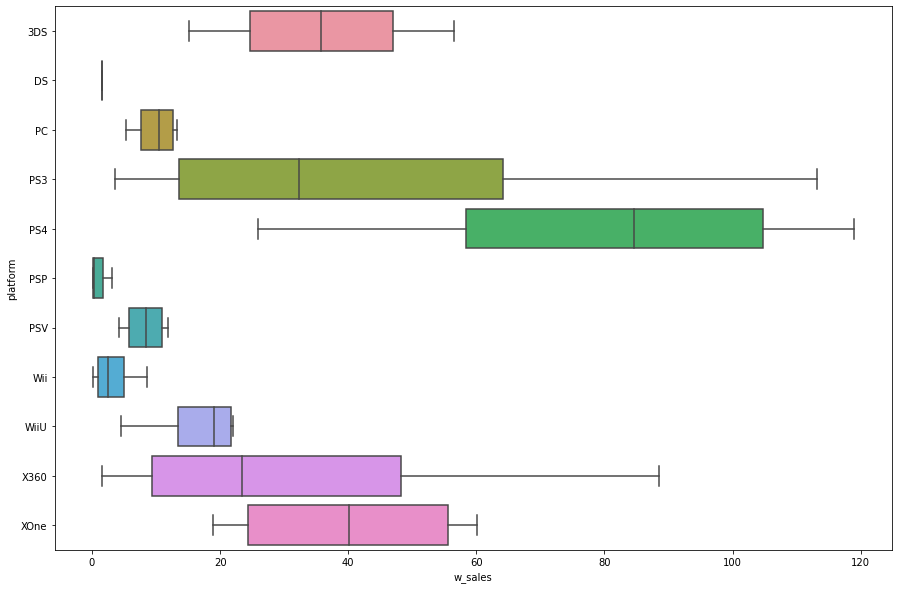

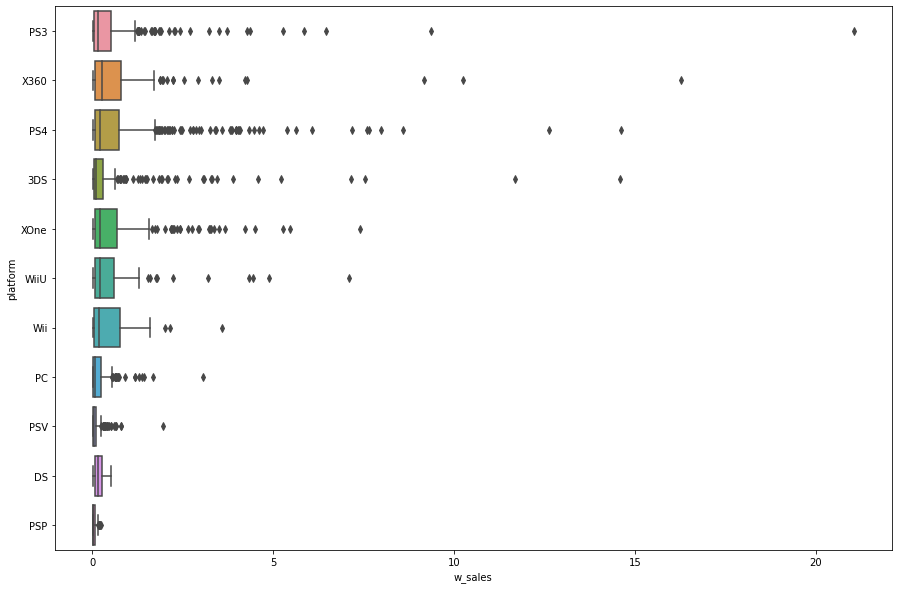

In [17]:
platform_sales=df_act.pivot_table(index=['platform','year_of_release'],values='w_sales',aggfunc='sum')
plt.figure(figsize=(15,10))
sns.boxplot(x="w_sales", y="platform", data=platform_sales.reset_index())

platform_sales=df_act.groupby('platform')['w_sales'].sum()
plt.figure(figsize=(15,10))
sns.boxplot( y=df_act["platform"],x=df_act["w_sales"], data=platform_sales.reset_index())
platform_sales

Из "ящика с усами" видим данные о продажах для каждой платформы, выделяется PS4, она является самой прибыльной за этот период.У xbox360 и PS3 видны вбросы с большими значениями, значит эти платформы имели несколько более популярных игр чем на ведущей приставке, 

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Диаграмма рассеяния для PS4


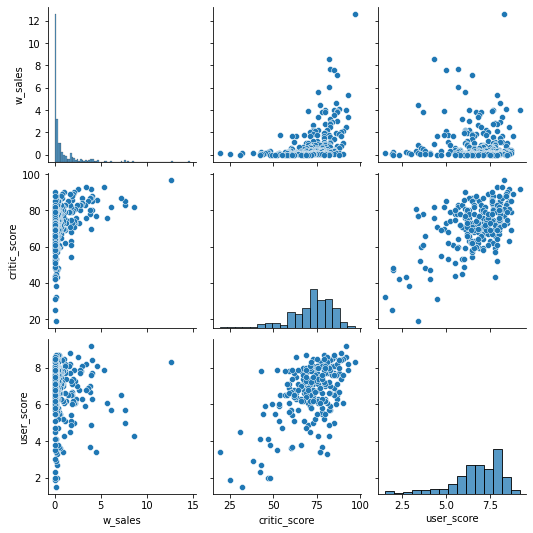

PS2
Корелляция продаж от оценок пользователей 0.18
Корелляция продаж от оценок критиков 0.39
X360
Корелляция продаж от оценок пользователей 0.11
Корелляция продаж от оценок критиков 0.39
PS3
Корелляция продаж от оценок пользователей 0.13
Корелляция продаж от оценок критиков 0.43
Wii
Корелляция продаж от оценок пользователей 0.11
Корелляция продаж от оценок критиков 0.18
DS
Корелляция продаж от оценок пользователей 0.13
Корелляция продаж от оценок критиков 0.24
PS
Корелляция продаж от оценок пользователей 0.3
Корелляция продаж от оценок критиков 0.45
PS4
Корелляция продаж от оценок пользователей -0.03
Корелляция продаж от оценок критиков 0.41


In [18]:
print("Диаграмма рассеяния для PS4")
diagr=sns.pairplot(df_act[df_act.platform == "PS4"][['w_sales', 'critic_score', 'user_score']])
plt.show()
df_act.groupby(['platform']).agg({'w_sales':'sum'}).sort_values(by='w_sales', ascending=False)
top_5 = list(df_platform.index[:7])#Платформы учавствующие в исследовании
for i in top_5:
    print(i)
    s=df[df.platform == i][['w_sales', 'critic_score', 'user_score']].corr()
    print(f'Корелляция продаж от оценок пользователей {s.user_score.w_sales.round(2)}')
    print(f'Корелляция продаж от оценок критиков {s.critic_score.w_sales.round(2)}')

Из матрицы рассеяния для PS4 видим что чем выше оценка критика тем выше продажи.Для остальных популярных платформ видим что корелляция продаж от оценок пользователей у всех платформ значительно ниже чем от оценок критиков. Следовательно при покупке игры оценка критиков имее для игроков большую значимость.

### Посмотрите на общее распределение игр по жанрам.

Соотнесите выводы с продажами игр на других платформах. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,mean,median
genre,,
Shooter,1.245882,0.450
Sports,0.703972,0.240
Platform,0.576081,0.225
Role-Playing,0.499623,0.125
Racing,0.469294,0.120
Fighting,0.441375,0.125
Action,0.420196,0.110
Misc,0.405290,0.100
Simulation,0.350968,0.100


,mean,median
genre,,
Shooter,1.245882,0.450
Sports,0.703972,0.240
Platform,0.576081,0.225
Role-Playing,0.499623,0.125
Fighting,0.441375,0.125
Racing,0.469294,0.120
Action,0.420196,0.110
Simulation,0.350968,0.100
Misc,0.405290,0.100


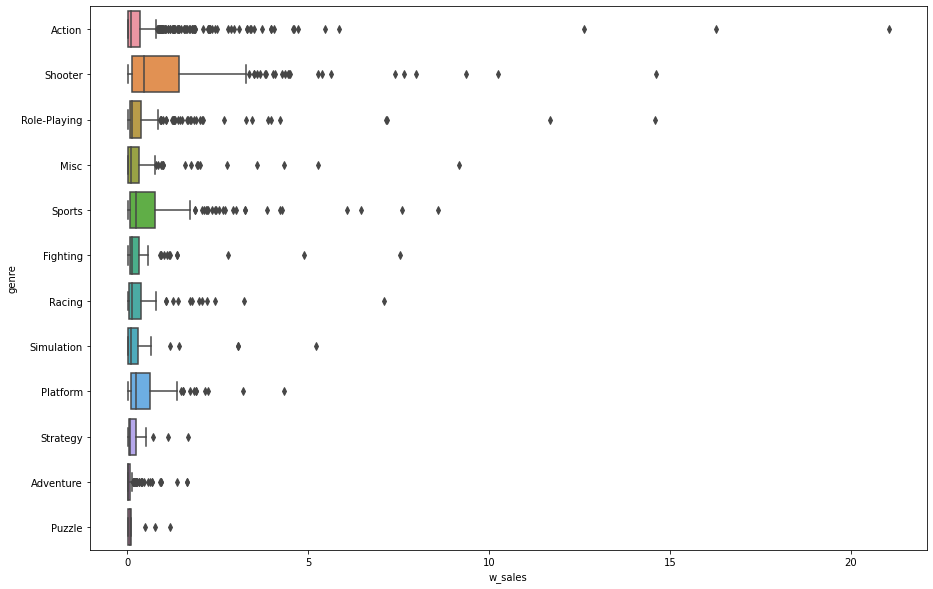

In [25]:
e = pd.pivot_table(df_act, index='genre', values='w_sales', aggfunc={'w_sales': ['mean', 'median']})
display(e.sort_values(by='mean',ascending=False))
display(e.sort_values(by='median',ascending=False))


p=df_act.groupby('genre')['w_sales'].median()
plt.figure(figsize=(15,10))
sns.boxplot( y=df_act['genre'],x=df_act["w_sales"], data=p.reset_index());

Shooter является самым популярным жанром, сразу за ним Sports и Platform. На "ящике с усами" видно что у жанра Action многие игры имели аномально высокие продажи, несмотря на эти единичные случаи Shooter продается лучше

## Шаг 4 Составьте портрет пользователя каждого региона 
Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж. Самые популярные жанры (топ-5). Поясните разницу. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### North America

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 16 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1309 non-null   object 
 1   platform         1309 non-null   object 
 2   year_of_release  1309 non-null   int64  
 3   genre            1309 non-null   object 
 4   na_sales         1309 non-null   float64
 5   eu_sales         1309 non-null   float64
 6   jp_sales         1309 non-null   float64
 7   other_sales      1309 non-null   float64
 8   critic_score     809 non-null    Int64  
 9   user_score       974 non-null    float64
 10  rating           1309 non-null   object 
 11  w_sales          1309 non-null   float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 134.2+ KB


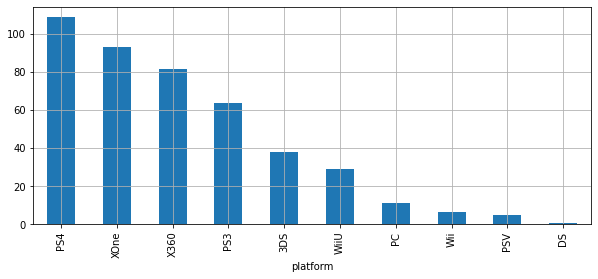

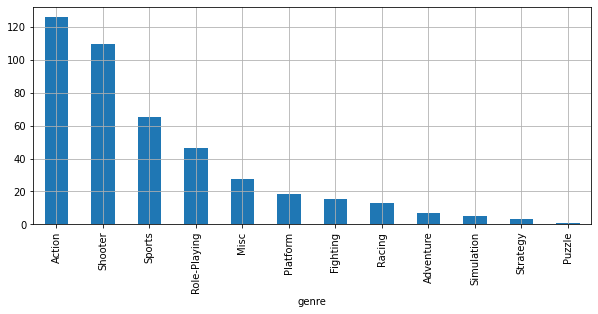

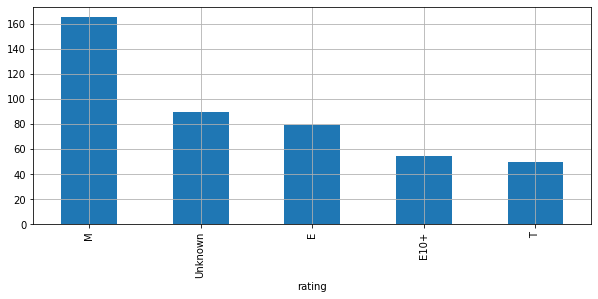

rating
M          165.21
Unknown     89.42
E           79.05
E10+        54.24
T           49.79
Name: na_sales, dtype: float64


In [20]:
def portrait (area):
    na.info()
    steps=['platform','genre','rating']
    for i in steps:
        na_platform = pd.pivot_table(na, index=i, values=area,
                                        aggfunc='sum').sort_values(area, ascending=False)
        plt.figure(figsize=(10,4))
        na_platform_graph = na_platform.reset_index()

        na_platform[area].plot.bar(grid=True)#plt.bar(na_platform_graph[area],height=2)
        plt.show()
    print(na_platform[area])
na= df_act.query('na_sales > 0')
portrait('na_sales')

- Американский пользователь отдает предпочтение консоли PS4. Конкурирующий XOne хоть и отстает, зато в прошлом поколении приставка обошла PS.
- Жанры по популярности

    - Action
    - Shooter
    - Sports
    - Role-Playing
    - Misc
- Популярны игры с рейтингом M (Mature)

### Europe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1422 non-null   object 
 1   platform         1422 non-null   object 
 2   year_of_release  1422 non-null   int64  
 3   genre            1422 non-null   object 
 4   na_sales         1422 non-null   float64
 5   eu_sales         1422 non-null   float64
 6   jp_sales         1422 non-null   float64
 7   other_sales      1422 non-null   float64
 8   critic_score     872 non-null    Int64  
 9   user_score       1047 non-null   float64
 10  rating           1422 non-null   object 
 11  w_sales          1422 non-null   float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 145.8+ KB


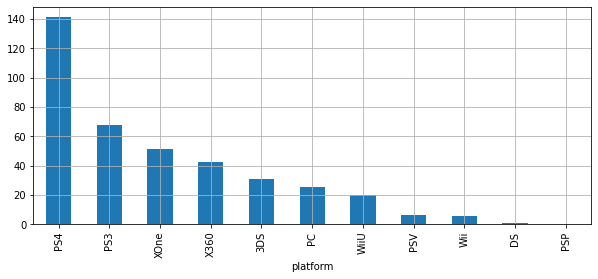

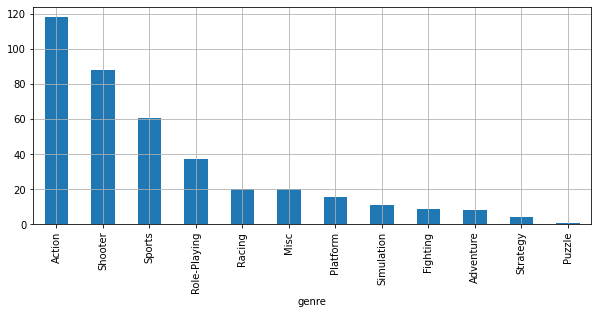

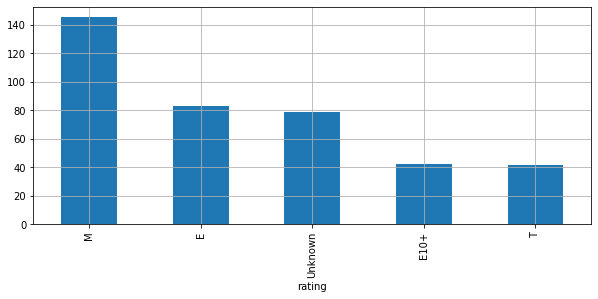

rating
M          145.32
E           83.36
Unknown     78.91
E10+        42.69
T           41.95
Name: eu_sales, dtype: float64


In [21]:
na= df_act.query('eu_sales > 0')
portrait('eu_sales')

- Европейские игроки однозначно предпочитают играть на консоли PS4
- Жанры по популярности

    - Action
    - Shooter
    - Sports
    - Role-Playing
    - Racing
- Популярны игры с рейтингом M (Mature)

### Japan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1187 non-null   object 
 1   platform         1187 non-null   object 
 2   year_of_release  1187 non-null   int64  
 3   genre            1187 non-null   object 
 4   na_sales         1187 non-null   float64
 5   eu_sales         1187 non-null   float64
 6   jp_sales         1187 non-null   float64
 7   other_sales      1187 non-null   float64
 8   critic_score     410 non-null    Int64  
 9   user_score       462 non-null    float64
 10  rating           1187 non-null   object 
 11  w_sales          1187 non-null   float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 121.7+ KB


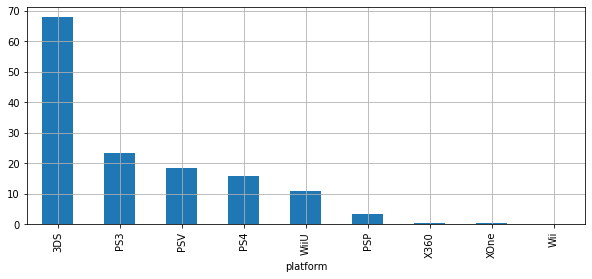

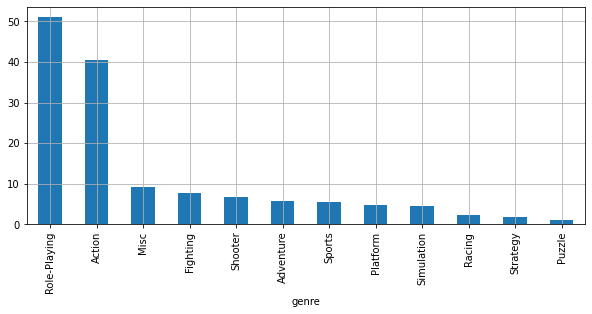

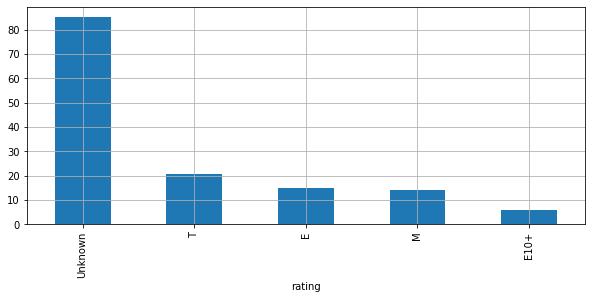

rating
Unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64


In [22]:
na= df_act.query('jp_sales > 0')
portrait('jp_sales')

- Японские игроки выбирают приставку 3DS видимо она больше подходит для игр жанра Role-Playing популярного в данном регионе.
- Жанры по популярности
    - Role-Playing
    - Action
    - Misc
    - Fighting
    - Shooter
- Выделяется рейтинг Teen, но большинство игр не отмечены рейтингом ESRB, скорее всего в японии своя система рейтингов

### Other

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1187 non-null   object 
 1   platform         1187 non-null   object 
 2   year_of_release  1187 non-null   int64  
 3   genre            1187 non-null   object 
 4   na_sales         1187 non-null   float64
 5   eu_sales         1187 non-null   float64
 6   jp_sales         1187 non-null   float64
 7   other_sales      1187 non-null   float64
 8   critic_score     410 non-null    Int64  
 9   user_score       462 non-null    float64
 10  rating           1187 non-null   object 
 11  w_sales          1187 non-null   float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 121.7+ KB


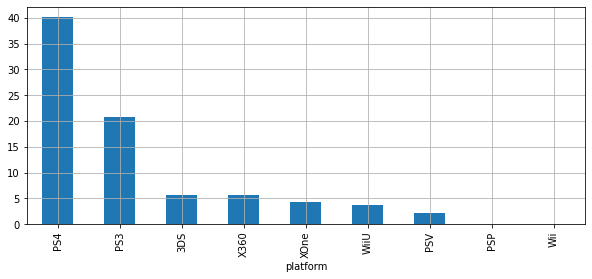

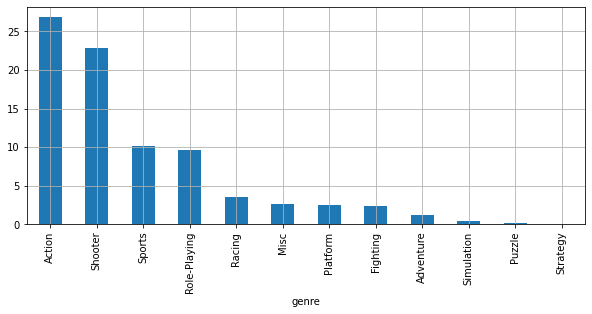

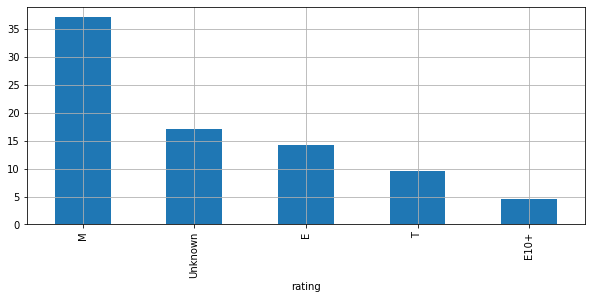

rating
M          37.13
Unknown    17.05
E          14.24
T           9.54
E10+        4.48
Name: other_sales, dtype: float64


In [23]:
na= df_act.query('jp_sales > 0')
portrait('other_sales')

- Для игроков остального мира самой предпочтительной является PS4.
- Жанры по популярности(Распределение похоже на европейское)
    - Action
    - Shooter
    - Sports
    - Role-Playing
    - Racing
- Выделяется рейтинг M


## Шаг. Проверьте гипотезы 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Задайте самостоятельно пороговое значение alpha. Поясните: Как вы сформулировали нулевую и альтернативную гипотезы; Какой критерий применили для проверки гипотез и почему.

Гипотеза 1

h0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

h1:Средние пользовательские рейтинги платформ Xbox One и PC разные

In [24]:
sample_1 = df_act[df_act['platform']=="XOne"]['user_score'].dropna() # Оценки пользователей Xbox One
sample_2 = df_act[df_act['platform']=="PC"]['user_score'].dropna()

alpha = 0.01

results = st.ttest_ind(sample_1,sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(sample_1.mean())
print(sample_2.mean())

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу
6.521428571428572
6.2696774193548395


На основании Т-теста не удалось отвергнуть нулевую гипотезу, утверждение о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые можно считать верным.

Гипотеза 2

h0:Средние пользовательские рейтинги жанров Action и Sports равны

h1:Средние пользовательские рейтинги жанров Action и Sports разные

In [25]:
sample_3 = df_act[df_act['genre']=="Action"]['user_score'].dropna()
sample_4 = df_act[df_act['genre']=="Sports"]['user_score'].dropna()

alpha = 0.01

results = st.ttest_ind(sample_3,sample_4)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(sample_3.mean())
print(sample_4.mean())

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу
6.837532133676092
5.238124999999999


Гипотезу о равенстве средних пользовательских оценок жанров Action и Sports нельзя принять на основании проведенного Т-теста, отвергаем ее в пользу альтернативной гипотезы.

## Общий вывод

У данной таблицы с данными в ходе предобработки данных, выявлены и обработаны пропуски, многие пропуски были оставлены для статистики. Пропуски в столбцах name и genre скорее всего случайны, может при заполнении данных таблицы были пропущены значения. А в столбцах critic_score, user_score и rating тем что для некоторых тигр рейтинг не собирался, в виду небольшой популярности игры или ранним годом выпуска. Обработаны аномалии, удалены приблизительно 1,6 % данных, что является допустимым. Названия столбцов приведены к нижнему регистру,были заменены типы данных. 
Исследовательский анализ данных показал что:

    - пик продаж по колличеству игр приходился на 2008-2009 годы. Затем новинок игровой индустрии становится меньше ,и к 2012 уровень выпуска новинок падает до уровня в начале тысячелетия.
    - для построения прогноза на 2017 год берем срез данных с 2013 года
    - характерный срок жизни платформы - 10 лет
    - потенциально прибыльные платформы - PS4, XOne, 3DS
    - Shooter является самым популярным жанром, сразу за ним Sports и Platform
    - при покупке игры оценка критиков имеет для игроков большую значимость.
Были составены портреты пользователя для разных регионов

    - В NA самая популярная платформа X360. в Европе предпочитают PS4. В Японии популярны 3DS.
    - Японский пользователь сильно отличается от общемирового, и жанрами и рейтингами
    - Можно выделить рейтинг Mature как основной
Были проверены гипотезы о равенстве средних:

    -Средние пользовательские рейтинги платформ Xbox One и PC одинаковые(не удалось отвергнуть)
    -Средние пользовательские рейтинги жанров Action и Sports равны(отвергли в пользу гипотезы неравенства)
Считаю что в 2017 году стоит сделать ставку на консоли нового поколения в зависимости от их популярности в каждом из регионов.. Такая же ситуация с жанром и возростному рейтингу. Судя по полуярности рейтинга M - основная часть геймеров старше 17 лет. Также стоит учитывать рейтинг критиков на вышедшую игру, чем он выше тем больше будет продаж.


Стоит учесть, что в конце актуального периода продажи игра падали по всем платформам, вероятно выручка в 2017 году будет меньше чем в 2016 пока не появятся консоли нового поколения,т.к. после выхода новых консолей резко начинают расти продажи игр. Заранее заключать договора на поставку игр в магазин.
Можно отметить, что стиабильными являются продажи игр на платформе PC.